# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from models.knn.knn import knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('../datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Instantiating model

In [3]:
knn_model = knn(k=3, type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [4]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)

    hit_rate_list.append(knn_model.score(X_test, y_test))

    y_pred = [knn_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [5]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.8548387096774194, 0.8387096774193549, 0.7419354838709677, 0.7741935483870968, 0.7741935483870968, 0.8064516129032258, 0.8225806451612904, 0.8548387096774194, 0.8064516129032258, 0.8225806451612904, 0.7741935483870968, 0.8064516129032258, 0.8225806451612904, 0.7741935483870968, 0.8225806451612904, 0.8709677419354839, 0.8387096774193549, 0.8548387096774194, 0.8387096774193549, 0.7258064516129032]

Accuracy:
0.811290322580645

Standard Deviation:
0.0385413004688662

Confusion Matrix:
[[ 7  5  0]
 [ 3 17  1]
 [ 0  0 29]]
[[ 6  5  0]
 [ 2 16  0]
 [ 1  2 30]]
[[ 7 10  0]
 [ 3 13  1]
 [ 1  1 26]]
[[ 4  5  1]
 [ 5 17  1]
 [ 0  2 27]]
[[ 7  4  0]
 [ 8 13  1]
 [ 0  1 28]]
[[ 7  4  0]
 [ 4 18  2]
 [ 1  1 25]]
[[ 7  4  0]
 [ 4 16  2]
 [ 1  0 28]]
[[ 4  5  0]
 [ 2 13  0]
 [ 1  1 36]]
[[ 6  3  0]
 [ 5 17  1]
 [ 1  2 27]]
[[12  3  0]
 [ 6 13  2]
 [ 0  0 26]]
[[ 6  7  0]
 [ 4 18  1]
 [ 1  1 24]]
[[ 7  5  0]
 [ 5 17  1]
 [ 0  1 26]]
[[10  3  0]
 [ 6 13  1]
 [ 1  0 28]]
[[ 9  7  0]
 [ 5 11 

# Choosing two columns from the last X_train and X_test to plot decision surface

In [6]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
181  64.62  15.23
99   58.52  13.92
307  61.45  22.69
146  85.58  30.46
276  51.33  13.63
..     ...    ...
161  67.26   7.19
309  33.84   5.07
3    69.30  24.65
145  85.64  42.69
248  47.32   8.57

[248 rows x 2 columns]
Test dataset:
         0      1
247  49.83  16.74
83   81.10  24.79
2    68.83  22.22
302  54.60  21.49
159  64.27  12.51
..     ...    ...
13   53.57  20.46
261  74.98  14.92
274  43.19   9.98
88   56.61  16.80
262  42.52  14.38

[62 rows x 2 columns]


# Training the model with the new dataset 2d

In [7]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting decision surface

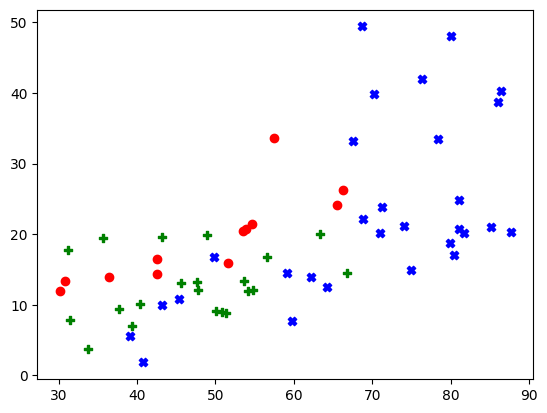

In [8]:
data = X_test_2d[:][:].values

y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(y_pred == 'DH')
sl = np.where(y_pred == 'SL')
no = np.where(y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='blue', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='green', marker='P', label='no')

plt.show()